In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [55]:
plt.rcParams['figure.figsize'] = (12, 6)  
plt.rcParams['figure.autolayout']

False

In [56]:
df=pd.read_csv("medical_examination.csv")


In [57]:
df['BMI'] = df['weight']/ ((df['height']/100)**2)
df['overweight']=(df['BMI']>25).astype(int)

In [58]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)


In [59]:
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], 
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    g=sns.catplot(x='variable', y='total', hue='value', col='cardio', 
                    kind='bar', data=df_cat, height=5, aspect=1)
    g.set_axis_labels("Variable", "Total Count")
    
    g.savefig('catplot.png')
    
    plt.show()
    
    return g.fig

In [60]:
def draw_heat_map():
   
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
    
    corr =  df_heat.corr()

    mask =  np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5, ax=ax)

    plt.show()

    fig.savefig('heatmap.png')
    return fig

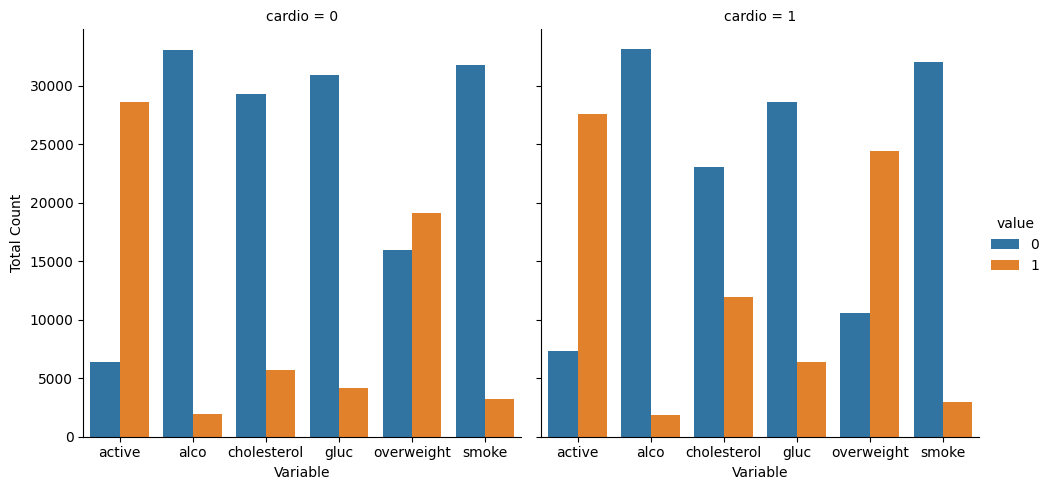

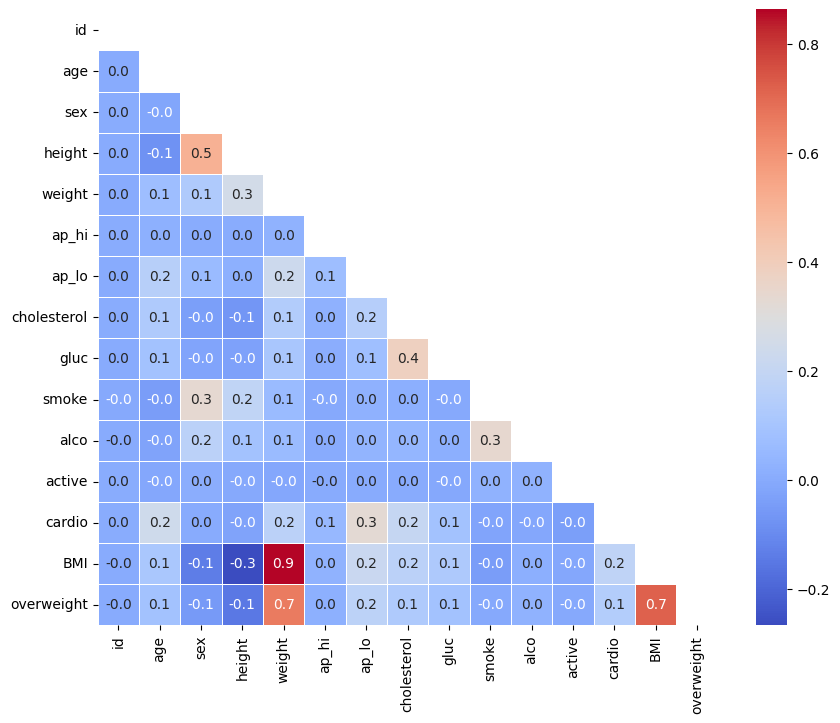

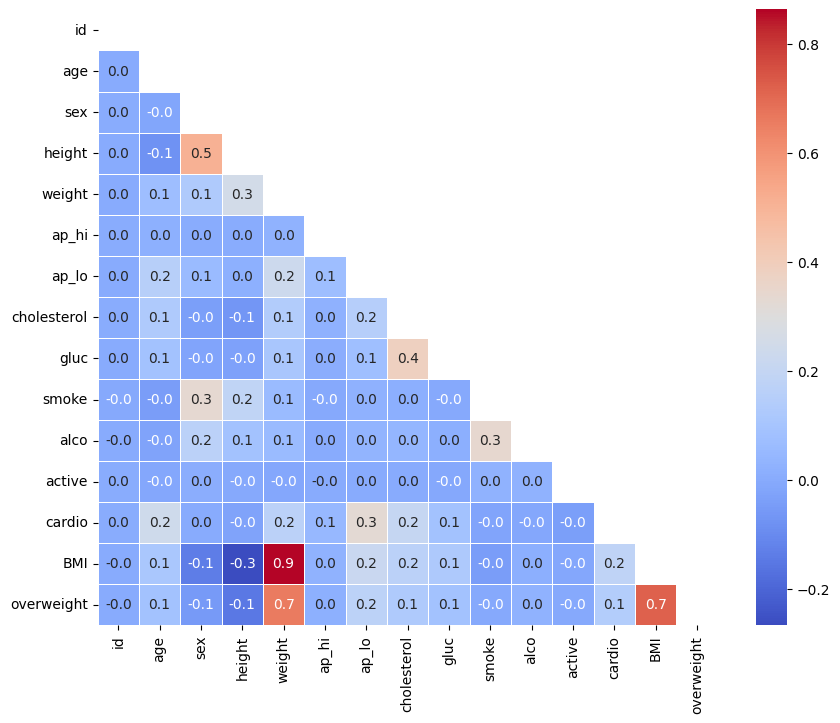

In [61]:
draw_cat_plot()
draw_heat_map()